## Assignment 5 – Support Vector Machine.
## Data Science 450

Answer the following questions:

- Using what you have learnt in the lecture, search for additional resources related to the following two approaches.
        -- Two-class Support Vector Machine
        -- Two-class Locally-Deep Support Vector Machine (MSR) Read - http://research.microsoft.com/en-us/um/people/manik/pubs/Jose13.pdf 
        
Explain what’s the differences between the two algorithms, and provide examples of when you will prefer to use one over the other.

**LDSVM is preferable if speed is required to make non-linear SVM predictions while maintaining classification accuracy above an acceptable limit.**
**LDSVM is preferable if Linear classifiers are not performing well.**

- For this exercise, we will use the veh-prime.arff file, and support vector machines for classification.
        -- As a first step you will need to modify the .arff file so that the car, noncar classes are re-placed with 1 and -1 respectively.
        -- Default run of SVM on this dataset yields the following numbers.
            -- SVM-Type:  C-classification 
                 -- SVM-Kernel:  radial 
                    -- cost:  1 
                    -- gamma:  0.02777778 
                    -- Number of Support Vectors:  371
            -- Here are model accuracy numbers.
                -- Model Accuracy On Test Dataset :  0.9370079 
                -- Model TPR On Test Dataset :  0.8955224 
                -- Model FPR On Test Dataset :  0.1044776
        -- Consider use 10 fold cross-validation (this should come up as the default)
**Model created in this run is better than the default as it can be confirmed by the accuracy numbers.**
            -- Run with the these paramaters(elsilon=seq(0,1,0.1), cost=1:100) yielded the following numbers.
                -- sampling method: 10-fold cross validation 
                -- best parameters:
                                     elsilon cost
                                           0    3

                -- best performance: 0.05573446 
                -- Given below are accuracy numbers
                    -- Model Accuracy On Test Dataset :  0.9566929 
                    -- Model TPR On Test Dataset :  0.9402985 
                    -- Model FPR On Test Dataset :  0.05970149
        -- Try various parameters, and explain what you observe.
**Model created in this run is better when you go by "best Performance" parameter, accuracy numbers however make the previous model better.**
            -- Run with these parameters(elsilon=seq(0,.2,0.1), cost=1:100)) yielded the following numbers.
            -- sampling method: 10-fold cross validation 
            -- best parameters:
                                 elsilon cost
                                       0    5
            -- best performance: 0.05745763 
            -- Given below are accuracy numbers.
                -- Model Accuracy On Test Dataset :  0.9488189 
                -- Model TPR On Test Dataset :  0.9328358 
                -- Model FPR On Test Dataset :  0.06716418 

## Load & examine the data set.

The function shown in the cell below loads the data from the .csv file. 
Execute the code in this cell to load the data into your notebook. Make sure you have the **.csv file** in your working directory!.

In [1]:
rm(list=ls())
# Clear Console:
cat("\014")
# Set repeatable random seed.
set.seed(123)
library(e1071)
#Load the dataset.
read.vehicles = function(file = 'veh-prime.arff.arff'){
  ## Read the arff file
  library(foreign)
  vehicles <- read.arff(file)
  vehicles[complete.cases(vehicles), ]
}

Warning message:
"package 'e1071' was built under R version 3.3.3"

### About the data set.

Hypotheical data provided for class assignment.

## Create functions used in this assignment.

In [2]:
# Partition the data into test and training data sets.
PartitionExact = function(dataSet, fractionOfTest = 0.3)
{
  #  browser()
  random <-runif(nrow(dataSet))
  quant <- quantile(random,fractionOfTest)
  testFlag <- random <= quant
  testingData <- dataSet[testFlag, ]
  trainingData <- dataSet[!testFlag, ]
  dataSetSplit <- list(trainingData=trainingData, testingData=testingData)
}

#Calculate Specificity (TPR)
Specificity <- function(Table.X)
{
  Specificity.X <- (Table.X[2,2])/(Table.X[1,2]+Table.X[2,2])
  return(Specificity.X)
}
#calculate FPR from Confusion MAtrix
FPR <- function(Table.X)
{
  FPR.X <- (Table.X[1,2])/(Table.X[1,2]+Table.X[2,2])
  return(FPR.X)
}
Accuracy <- function(Table.X)
{
  Accuracy.X <- (Table.X[1,1]+Table.X[2,2])/(Table.X[1,1]+Table.X[1,2]+Table.X[2,1]+Table.X[2,2])
  return(Accuracy.X)
}

## Load the file.
I am now calling the function "LoadData" to load the Video_Store.csv file.

In [3]:
# Load and cleanse the csv file.
vehicles = read.vehicles()


## Check data structure.

In [4]:
#Check the structure of the dataset.
str(vehicles)

'data.frame':	846 obs. of  37 variables:
 $ f0   : num  0.063 -0.037 0 -0.743 -0.939 -0.247 0 0.663 0.001 -0.048 ...
 $ f1   : num  0.16 -0.325 1.253 -0.082 -1.054 ...
 $ f2   : num  0.509 -0.626 0.833 -0.626 -0.14 ...
 $ f3   : num  -0.967 -0.029 -0.97 0.723 0.036 -0.484 -0.032 -0.321 0.008 0.319 ...
 $ f4   : num  0.058 0.121 1.516 -0.006 -0.766 ...
 $ f5   : num  0 -0.409 0.014 0 0 0.102 -0.162 0.087 -0.517 -0.259 ...
 $ f6   : num  0.874 -0.002 -0.378 -0.08 -0.272 -0.001 -0.49 -0.499 -0.472 0.745 ...
 $ f7   : num  0.271 -0.835 1.197 -0.297 1.077 ...
 $ f8   : num  1.307 -0.595 0.546 0.166 5.236 ...
 $ f9   : num  -0.011 -0.253 -0.402 0.311 -0.366 0.729 -0.02 -0.307 0 0.613 ...
 $ f10  : num  0.311 0.094 0.311 0.094 9.439 ...
 $ f11  : num  -0.063 0.375 0.017 -0.677 -0.5 0.031 0.509 0.299 0.226 0.284 ...
 $ f12  : num  -0.414 -0.005 0.07 0.023 0.061 -0.35 -0.135 0.009 -0.962 0.952 ...
 $ f13  : num  -0.206 -0.597 1.148 -0.747 -0.597 ...
 $ f14  : num  0.136 0.521 -1.144 0.649 0.521

### View the Head.

In [5]:
#check the data set header
head(vehicles)

f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f27,f28,f29,f30,f31,f32,f33,f34,f35,CLASS
0.063,0.160,0.509,-0.967,0.058,0.000,0.874,0.271,1.307,-0.011,...,-0.924,-0.077,0.108,-0.003,0.381,-0.314,0.929,0.184,-0.001,noncar
-0.037,-0.325,-0.626,-0.029,0.121,-0.409,-0.002,-0.835,-0.595,-0.253,...,0.270,0.533,0.152,-0.978,0.157,0.011,-0.254,0.453,-0.621,noncar
0.000,1.253,0.833,-0.970,1.516,0.014,-0.378,1.197,0.546,-0.402,...,-0.408,1.550,0.010,-0.652,-0.403,-0.151,0.000,0.049,-0.113,car
-0.743,-0.082,-0.626,0.723,-0.006,0.000,-0.080,-0.297,0.166,0.311,...,0.819,-0.077,-0.099,-0.001,-0.291,1.633,0.686,1.528,0.000,noncar
-0.939,-1.054,-0.140,0.036,-0.766,0.000,-0.272,1.077,5.236,-0.366,...,0.676,0.533,-0.003,0.122,-0.179,-1.449,0.024,-1.698,0.083,noncar
-0.247,1.618,1.967,-0.484,1.516,0.102,-0.001,0.091,-1.482,0.729,...,-0.699,-0.280,0.003,-0.841,-0.403,-1.287,-0.033,-1.698,0.000,noncar


## Convert CLASS to Factor with 1 & -1

In [6]:
library(dplyr)
vehiclessvm <- vehicles
#Convert to factor with numeric values for SVM
vehiclessvm %>% mutate_if(is.factor, as.character) -> vehiclessvm
vehiclessvm$CLASS[vehiclessvm$CLASS == "car"] <- 1
vehiclessvm$CLASS[vehiclessvm$CLASS == "noncar"] <- -1
vehiclessvm %>% mutate_if(is.character, as.factor) -> vehiclessvm


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



## Split dataset into training and test dataset

In [7]:
vehiclesDatasetsvm = PartitionExact(vehiclessvm)
Testvehiclessvm <- vehiclesDatasetsvm$testingData
Trainvehiclessvm <-vehiclesDatasetsvm$trainingData

cat("Count of Train Dataset : ", nrow(Trainvehiclessvm),"\n" )
cat("Count of Test Dataset : ", nrow(Testvehiclessvm),"\n" )

Count of Train Dataset :  592 
Count of Test Dataset :  254 


## Create default SVM Model

In [8]:
modelsvm <- svm(CLASS ~ . , Trainvehiclessvm)

## Print SVM  and its Summary

In [9]:
print(modelsvm)
summary(modelsvm)


Call:
svm(formula = CLASS ~ ., data = Trainvehiclessvm)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.02777778 

Number of Support Vectors:  371




Call:
svm(formula = CLASS ~ ., data = Trainvehiclessvm)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.02777778 

Number of Support Vectors:  371

 ( 191 180 )


Number of Classes:  2 

Levels: 
 -1 1




## Predict based on test dataset.

In [10]:
predictedsvmCLASS <- predict(modelsvm, Testvehiclessvm)

## Check the model accuracy.

In [11]:
#Check Accuracy
tablesvm <- table(predictedsvmCLASS, Testvehiclessvm$CLASS)
#Accuracy
Accuracysvm <- Accuracy(tablesvm)
cat("Model Accuracy On Test Dataset : ", Accuracysvm,"\n" )
# Calculate TPR of SVM
TPRsvm <- Specificity(tablesvm)
cat("Model TPR On Test Dataset : ", TPRsvm,"\n" )
# Calculate FPR of SVM
FPRsvm <- FPR(tablesvm)
cat("Model FPR On Test Dataset : ", FPRsvm,"\n" )

Model Accuracy On Test Dataset :  0.9370079 
Model TPR On Test Dataset :  0.8955224 
Model FPR On Test Dataset :  0.1044776 


## Tune The SVM Model For Higher Accuracy.

In [12]:
#Tune SVM model
TunedModelsvm=tune(svm, CLASS ~ ., data=Trainvehiclessvm,ranges=list(elsilon=seq(0,1,0.1), cost=1:100))

## Print Optimum Value Of Model Parameters

In [13]:
print(TunedModelsvm)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 elsilon cost
       0    3

- best performance: 0.05573446 



## Plot The Performance Of Tuned Model.

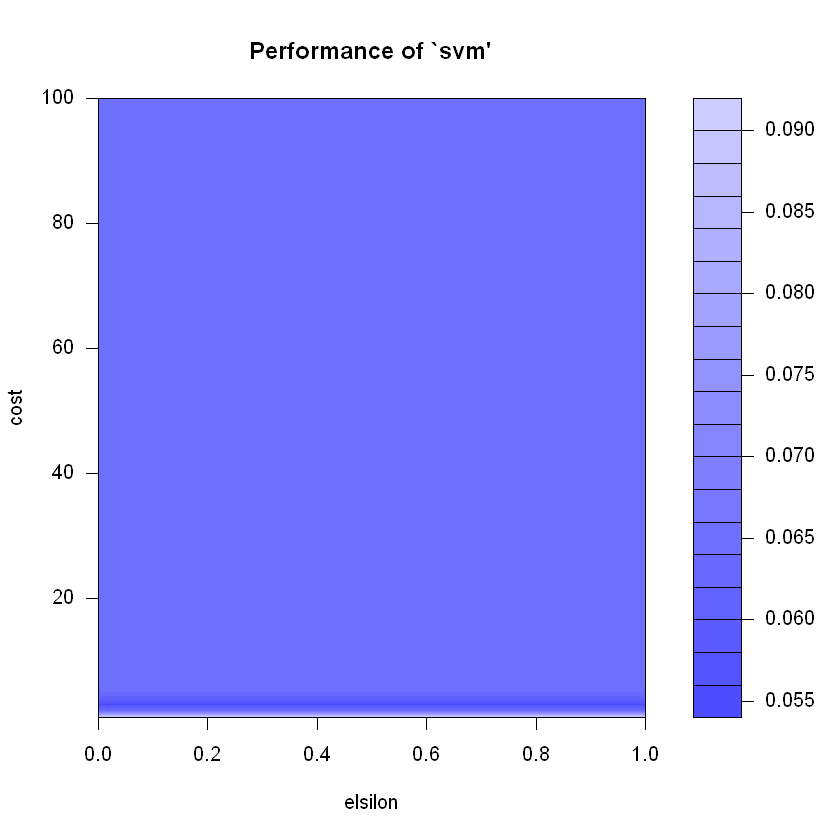

In [14]:
plot(TunedModelsvm)

## Select The Best Model

In [15]:
#Find out the best model
BstsvmModel=TunedModelsvm$best.model

## Predict CLASS using best model.


In [16]:
PredBstCLASSsvm=predict(BstsvmModel,Testvehiclessvm)

## Check Accuracy.

In [17]:
tablebstsvm <- table(PredBstCLASSsvm, Testvehiclessvm$CLASS)
#Accuracy
Accuracybstsvm <- Accuracy(tablebstsvm)
cat("Model Accuracy On Test Dataset : ", Accuracybstsvm,"\n" )
# Calculate TPR of SVM
TPRbstsvm <- Specificity(tablebstsvm)
cat("Model TPR On Test Dataset : ", TPRbstsvm,"\n" )
# Calculate FPR of SVM
FPRbstsvm <- FPR(tablebstsvm)
cat("Model FPR On Test Dataset : ", FPRbstsvm,"\n" )

Model Accuracy On Test Dataset :  0.9566929 
Model TPR On Test Dataset :  0.9402985 
Model FPR On Test Dataset :  0.05970149 


## Further Tune The SVM Model

In [18]:
#Tune SVM model further
TunedModelsvmmore=tune(svm, CLASS ~ ., data=Trainvehiclessvm,ranges=list(elsilon=seq(0,.2,0.1), cost=1:100))

## Print Optimum Value Of Model Parameters

In [19]:
#Print optimum value of parameters
print(TunedModelsvmmore)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 elsilon cost
       0    7

- best performance: 0.05570621 



## Plot the performance of new SVM Regression models.

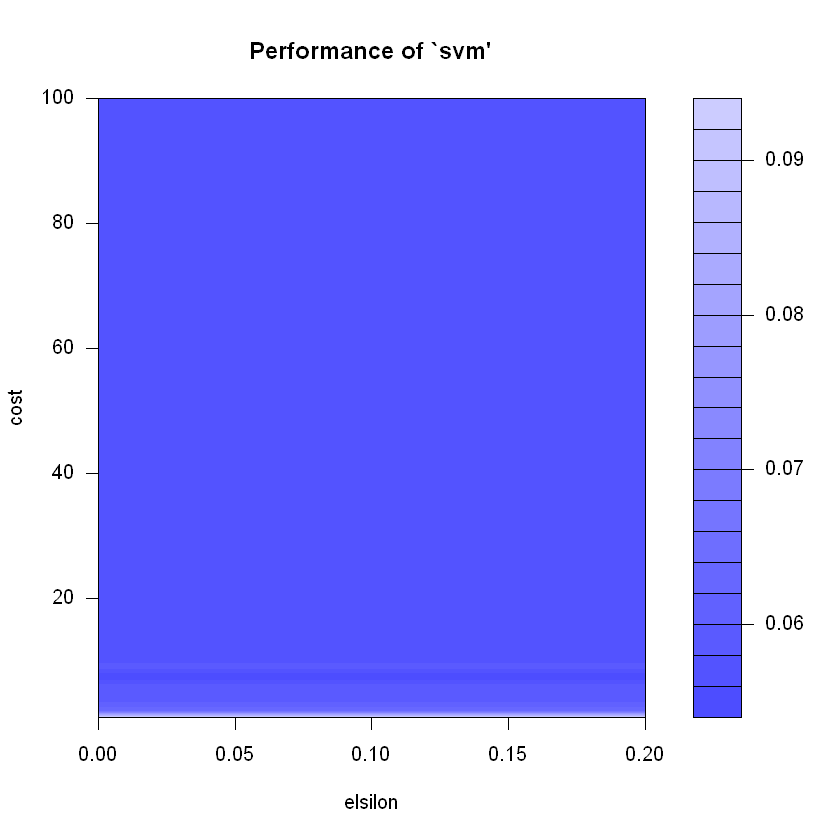

In [20]:
plot(TunedModelsvmmore)

## Select the best model

In [21]:
#Find out the best model
BstModelmore=TunedModelsvmmore$best.model

## Predict CLASS using best model.

In [22]:
#Predict CLASS using best model
PredBstCLASSsvmmore=predict(BstModelmore,Testvehiclessvm)

## Check Accuracy of the new model.

In [23]:
#Check Accuracy
tablebstsvmmore <- table(PredBstCLASSsvmmore, Testvehiclessvm$CLASS)
#Accuracy
Accuracybstsvmmore <- Accuracy(tablebstsvmmore)
cat("Model Accuracy On Test Dataset : ", Accuracybstsvmmore,"\n" )
# Calculate TPR of SVM
TPRbstsvmmore <- Specificity(tablebstsvmmore)
cat("Model TPR On Test Dataset : ", TPRbstsvmmore,"\n" )
# Calculate FPR of SVM
FPRbstsvmmore <- FPR(tablebstsvmmore)
cat("Model FPR On Test Dataset : ", FPRbstsvmmore,"\n" )

Model Accuracy On Test Dataset :  0.9488189 
Model TPR On Test Dataset :  0.9328358 
Model FPR On Test Dataset :  0.06716418 
